# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [1]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

def find_mean(data):
  return sum(data)/len(data)
def find_variance(data):
  mean = find_mean(data)
  return (sum([(x-mean)**2 for x in data]))/len(data)-1
def find_sd(data):
  return find_variance(data)**.5
sales_mean = find_mean(sales)
sales_variance = find_variance(sales)
sales_sd = find_sd(sales)
print("Mean: ", sales_mean)
print("Variance: ", sales_variance)
print("Standard Deviation: ", sales_sd)

Mean:  3052.714285714286
Variance:  183760.06122448976
Standard Deviation:  428.6724404769798


In [2]:
import numpy as np
# Double check answers with numpy
print(np.mean(sales))
print(np.var(sales))
print(np.std(sales))

3052.714285714286
183761.06122448976
428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [3]:
daily_customers = [127, 80, 105, 92, 120, 115, 93]

cov_matrix = np.cov(sales, daily_customers)
print(cov_matrix)

[[214387.9047619    7604.35714286]
 [  7604.35714286    290.95238095]]


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [4]:
# Not sure what I just calculated here, clearly not the correlation coefficient

customers_mean = find_mean(daily_customers)
customers_variance = find_variance(daily_customers)
customers_sd = find_sd(daily_customers)

def find_corrco(xdata, zdata):
  xmean = find_mean(xdata)
  xsd = find_sd(xdata)
  zmean = find_mean(zdata)
  zsd = find_sd(zdata)
  xstandard = [(value - xmean)/xsd for value in xdata]
  zstandard = [(value - zmean)/zsd for value in zdata]
  return sum([zstandard[x]*xstandard[x] for x in range(0, len(xdata))])/len(xdata)-1

print(find_corrco(daily_customers, sales))

-0.03522717678184362


In [5]:
# Check work with numpy lib
print(np.corrcoef(daily_customers, sales))

[[1.         0.96283398]
 [0.96283398 1.        ]]


In [6]:
# Lets try this again using the covariance matrix
def corrcoef(cov_mat):
  corrco_matrix = [[None for _ in range(int(len(cov_mat)))] for _ in range(int(len(cov_mat[0])))]
  for i in range(0,len(cov_mat)):
    for j in range(0,len(cov_mat[0])):
      corrco_matrix[i][j] = (cov_mat[i][j])/((cov_mat[i][i]*cov_mat[j][j])**.5)
  return corrco_matrix
print(corrcoef(cov_matrix))
# That's the one.

[[1.0, 0.9628339778148909], [0.9628339778148909, 1.0]]


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [7]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

titanic_data = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv", index_col="Unnamed: 0")
print(titanic_data.describe())
titanic_data.head()

            pclass     survived          age        sibsp        parch         fare        body  has_cabin_number
count  1309.000000  1309.000000  1310.000000  1309.000000  1309.000000  1308.000000  121.000000       1310.000000
mean      2.294882     0.381971    29.881135     0.498854     0.385027    33.295479  160.809917          0.225191
std       0.837836     0.486055    12.878277     1.041658     0.865560    51.758668   97.696922          0.417867
min       1.000000     0.000000     0.166700     0.000000     0.000000     0.000000    1.000000          0.000000
25%       2.000000     0.000000    22.000000     0.000000     0.000000     7.895800   72.000000          0.000000
50%       3.000000     0.000000    29.881135     0.000000     0.000000    14.454200  155.000000          0.000000
75%       3.000000     1.000000    35.000000     1.000000     0.000000    31.275000  256.000000          0.000000
max       3.000000     1.000000    80.000000     8.000000     9.000000   512.329200  328

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [99]:
titanic_data.dtypes
titanic_cov = titanic_data._get_numeric_data().cov()
titanic_corr = titanic_data._get_numeric_data().corr()
print(titanic_cov)
print(titanic_corr)
print(corrcoef(np.array(titanic_cov)))
# titanic_data._get_numeric_data().T

                     pclass  survived         age     sibsp     parch         fare         body  has_cabin_number
pclass             0.701969 -0.127248   -3.954605  0.053090  0.013287   -24.227788    -2.876653         -0.249992
survived          -0.127248  0.236250   -0.314343 -0.014088  0.034776     6.146023     0.000000          0.061406
age               -3.954605 -0.314343  165.850021 -2.559806 -1.459378   114.416613    81.622922          1.463138
sibsp              0.053090 -0.014088   -2.559806  1.085052  0.336833     8.641768    -8.708471         -0.003946
parch              0.013287  0.034776   -1.459378  0.336833  0.749195     9.928031     4.237190          0.013316
fare             -24.227788  6.146023  114.416613  8.641768  9.928031  2678.959738  -179.164684         10.976961
body              -2.876653  0.000000   81.622922 -8.708471  4.237190  -179.164684  9544.688567          3.625689
has_cabin_number  -0.249992  0.061406    1.463138 -0.003946  0.013316    10.976961     3

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

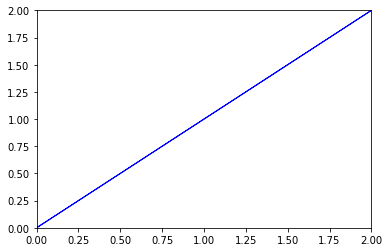

0

In [100]:
import matplotlib.pyplot as plt

# This function sucks, burn it with fire.
def plot_two_vectors(vec1, vec2):
  xminmax = (0,vec2[0]) if vec2[0] > vec1[0] else (0, vec1[0])
  yminmax = (0,vec2[1]) if vec2[1] > vec1[1] else (0, vec1[1])
  plt.arrow(0, 0, vec1[0], vec1[1], head_width=0.1, head_length=0.1, color='red')
  plt.arrow(0, 0, vec2[0], vec2[1], head_width=0.1, head_length=0.1, color='blue')
  plt.xlim(xminmax[0],xminmax[1])          
  plt.ylim(yminmax[0],yminmax[1])
  plt.show()

avector = [-2, 2]
bvector = [2, 2]
plot_two_vectors(avector, bvector)
np.dot(avector, bvector)
# A synonym for orthogonal is perpendicular

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [10]:
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])
print(np.dot(a,b))
# They are not orthogonal, their dotproduct isn't 0

-40


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [21]:
c = np.array([2, -15, 6, 20])
print(np.linalg.norm(c)**2)
print(np.dot(c,c))
print(np.dot(c.T,c))

# They all end up returning the norm of the array

665.0
665
665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
|| r|| = \sqrt{7^2 + 12^2}
\qquad
||r||=\sqrt{2^2+11^2+(-8)^2}
\end{align}

\begin{align}
|| r|| = \sqrt{49 + 144}
\qquad
||r||=\sqrt{4+121+64}
\end{align}

\begin{align}
|| r|| = \sqrt{193}
\qquad
||r||=\sqrt{189}
\end{align}

\begin{align}
u_{r} = (\frac{7\sqrt{193}}{193}, \frac{12\sqrt{193}}{193})
\qquad
u_{r}=(\frac{2\sqrt{189}}{189}, \frac{11\sqrt{189}}{189},-\frac{8\sqrt{189}}{189})
\end{align}

\begin{align}
v=7i+12j
\qquad
v=2i+11j-8k
\end{align}



## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [27]:
f = np.array([4,12,11,9,2])
funit = f/np.linalg.norm(f)
print(funit)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import colors as mcolors

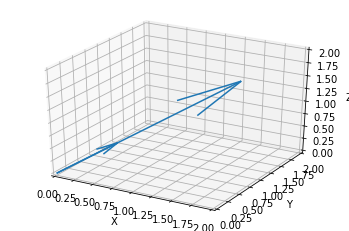

In [31]:
vector3 = np.array([[0, 0, 0, .5, .5, .5], [0, 0, 0, 1.5, 1.5, 1.5]])

X, Y, Z, U, V, W = zip(*vector3)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([0,2])
ax.set_ylim([0,2])
ax.set_zlim([0,2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

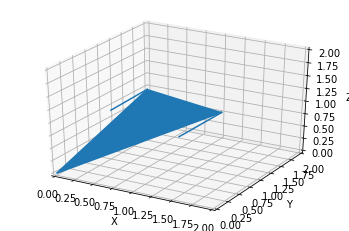

In [52]:
# Plot 2 nonlinear vectors and show the span between them with a polygon
# Actually it isn't the full span...

vector3 = np.array([[0, 0, 0, .75, .75, 1.5],[0, 0, 0, 1, 2, .5]])

X, Y, Z, U, V, W = zip(*vector3)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
x = [0, .75 ,1]
y = [0, .75, 2]
z = [0, 1.5, .5]
verts = [list(zip(x,y,z))]
ax.add_collection3d(Poly3DCollection(verts))
ax.set_xlim([0,2])
ax.set_ylim([0,2])
ax.set_zlim([0,2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

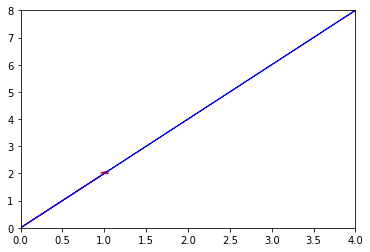

In [64]:
g = np.array([1,2])
h = np.array([4,8])
plot_two_vectors(g, h)
# The span is anywhere along the line the follow as they're linearly dependent 

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

The span should be the whole 3rd dimension

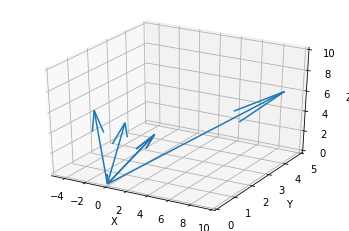

In [71]:
vector3 = np.array([[0, 0, 0, 1, 2, 3], [0, 0, 0, -1, 0, 7], [0, 0, 0, 4, 8, 2]])

X, Y, Z, U, V, W = zip(*vector3)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([-5,10])
ax.set_ylim([0,5])
ax.set_zlim([0,10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



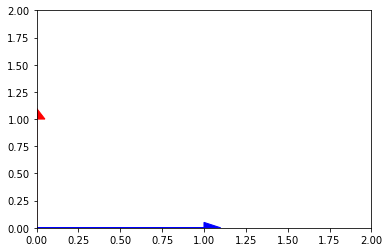

In [70]:
plt.arrow(0, 0, 0, 1, head_width=0.1, head_length=0.1, color='red')
plt.arrow(0, 0, 1, 0, head_width=0.1, head_length=0.1, color='blue')
plt.xlim(0,2)          
plt.ylim(0,2)
plt.show()

## 6.2 What does it mean to form a basis?

A basis is two vectors which can be added to or scaled to create any other vector needed on that plane.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}
add row 1 to row 2
\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 2 & 10 \\
4 & 8  & 2
\end{bmatrix}
\end{align}
divide row 2 by 2
\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 1 & 5 \\
4 & 8  & 2
\end{bmatrix}
\end{align}
subtract row 1 from row 3 4 times
\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 1 & 5 \\
0 & 0  & -10
\end{bmatrix}
\end{align}
multiply row 3 by -1/10
\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 1 & 5 \\
0 & 0  & 1
\end{bmatrix}
\end{align}

In [72]:
print(np.linalg.matrix_rank(vector3))

3


## 7.2 What does the rank of a matrix tell us?

The rank tells us it spans the entire 3rd dimension

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


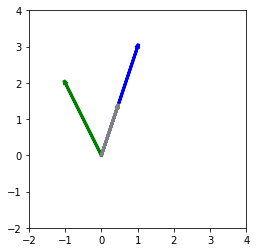

In [103]:
# This looks correct but I'm still not sure why, I thought a projection
# was supposed to cast from a perpendicular like from the vector being projected

plt.xlim(-2, 4)
plt.ylim(-2, 4)
v = np.array([1, 3])
w = np.array([-1, 2])
proj = np.dot(1/np.linalg.norm(w), v)

axes = plt.gca()
plt.axes().set_aspect('equal')

x_vals = np.array(axes.get_xlim())
y_vals = 1/3*x_vals

# plt.plot(x_vals, y_vals, '--', color='r', linewidth=1)

plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, color='blue')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, color='green')
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, color='gray')
plt.show()

In [93]:
np.linalg.norm([2,2])

2.8284271247461903

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

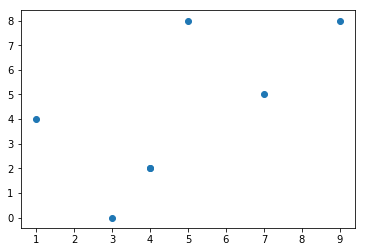

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()